### Connect colab to googledrive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!ls "/content/drive/My Drive"

 109-1教學媒體與操作
'109-1 無脊椎動物學實驗照片'
'112學年 上學期 社會昆蟲實驗室 Meeting報告順序.docx'
 2020遠哲夏令營
'20230502_作業. s0824029 生四 翟珈葳'
'20230509_作業 生四 s0824029 翟珈葳'
 20230620期末考_S0824029翟珈葳
 ant
'Ant lab'
 ch24
 chaiwei_PythonEDA_Review_EN.ipynb.ipynb」的副本
 Class
'Colab Notebooks'
'image processing'
 IMG_5348.HEIC
 P7280017-1.JPG
'S0824029 翟珈葳'
's0824029 翟珈葳 0411作業'
 statistics
 Untitled0.ipynb
 列印
 區域文學
 大學部
 女排
 成長營
 教學專業實作
 教學專業實作期末party資料
'果蠅一唷喔唷(都在群組相簿內'
 照片
'生四  S0824029 翟珈葳 0425 作業'
 生四_翟珈葳_S0824029
 生四_翟珈葳_S0824029_期中心得.pdf
 碩士班


 ### Import MNIST dataset

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Check the shape of training data

In [ ]:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Have quick view of the training data

In [ ]:
x_train[0]


In [ ]:

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###Image Enhancement

In [ ]:

data = x_train[0].copy()
data[data>0]=1

In [ ]:
text_image=[]
for i in range(data.shape[0]):
  text_image.append(''.join(str(data[i])))
text_image
#將矩陣轉換成文字(字串)，並連接起來join，用迴圈是為了換行

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0

### Show the first image of the training set

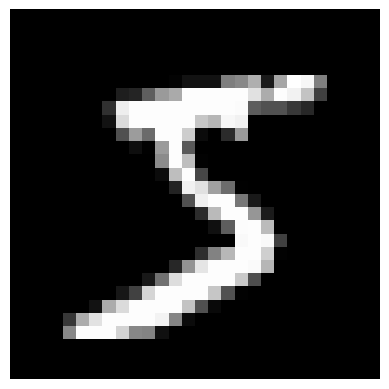

In [ ]:
import matplotlib.pyplot as plt
x2 = x_train[0,:]#二維函數，取第0筆資料，全部取用(為矩陣)
plt.imshow(x2.reshape(28,28),cmap='gray')#調整數距大小
plt.axis('off')#不需要軸的分隔
plt.show()

### Normalize the pixel

In [ ]:
#將象數標準化(最小0最大255)
x_train_norm,x_test_norm=x_train/255.0,x_test/255.0 #.0為除以符點數 分別設定後端兩個算式定義為前端兩項

### Setup the framework of the training model

In [ ]:
#設定架構
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),#扁平化input data
    tf.keras.layers.Dense(128,activation='relu'),#隱藏層 128層 relu讓神經元輸出非線性(若為線性則會較快結束)
    tf.keras.layers.Dropout(0.2),#每次拿掉20%的data，用剩下做訓練，可以避免overfitting，也可將拿掉了數據做再次模型評估
    tf.keras.layers.Dense(10,activation='softmax')#設定output 10個神經元
])

### Setup the optimizer, loss function and performance metrics

In [ ]:
#設定優化器
model.compile(optimizer='adam',#optimizer 在訓練過程中計算loss function
        loss='sparse_categorical_crossentropy', #為loss function 實際與觀察的誤差範圍多寡
        metrics=['accuracy'] #呈現模型效能(ex:準確度)
)

### Perform model training

In [ ]:

history = model.fit(x_train_norm,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3321 - accuracy: 0.9035 - val_loss: 0.1531 - val_accuracy: 0.9569
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1577 - accuracy: 0.9533 - val_loss: 0.1117 - val_accuracy: 0.9674
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1182 - accuracy: 0.9646 - val_loss: 0.1100 - val_accuracy: 0.9669
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0963 - accuracy: 0.9705 - val_loss: 0.0910 - val_accuracy: 0.9723
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.0787 - val_accuracy: 0.9764


### Plot the performance curve (accuracy)

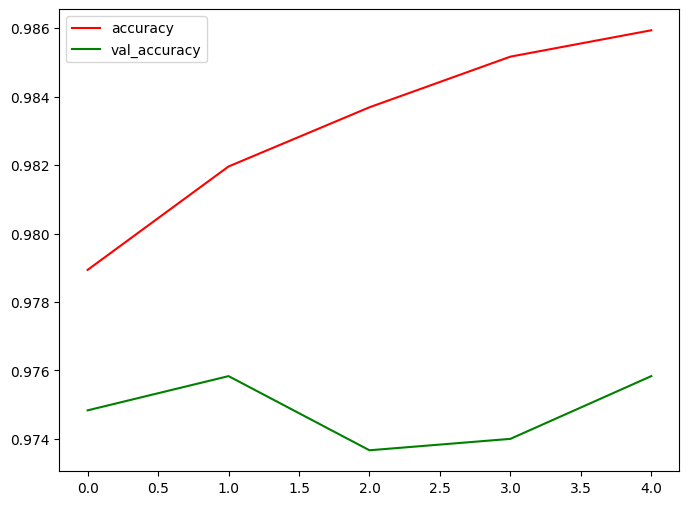

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'],'r',label='accuracy')
plt.plot(history.history['val_accuracy'],'g',label='val_accuracy')
plt.legend()

### Plot the performance curve (loss)

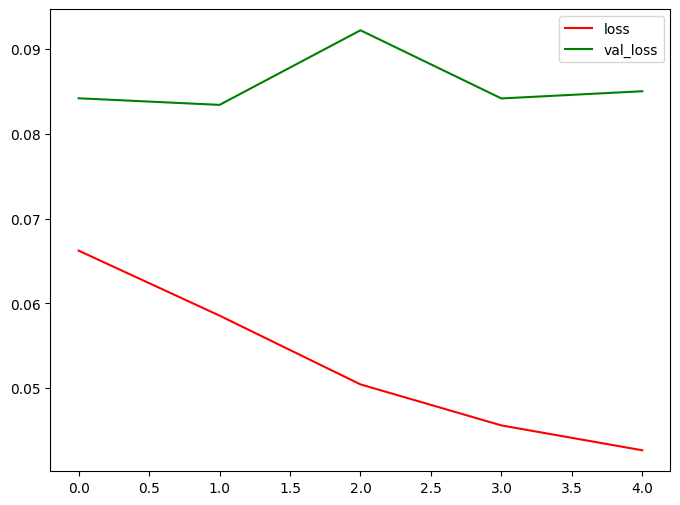

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],'r',label='loss')
plt.plot(history.history['val_loss'],'g',label='val_loss')
plt.legend()

### Scoring the trained model

In [ ]:
score = model.evaluate(x_test_norm,y_test,verbose=0)

for i,x in enumerate(score):
  print(f'{model.metrics_names[i]}:{score[i]:.4f}')

loss:0.0796
accuracy:0.9776


### Perform the prediction

In [ ]:
import numpy as np #numpy為處理矩陣的套件
predictions = np.argmax(model.predict(x_train_norm),axis=1)
print('actual:',y_test[0:20])
print('prediction:',predictions[0:20])

1875/1875 [==============================] - 3s 2ms/step
actual: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
prediction: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


### Compute the Prediction Probability of 0 to 9 for the test data

In [ ]:
predictions = model.predict(x_test_norm[8:9])#取資料第九個 丟到model中預測
print(np.around(predictions[0],2))#預測結果會在list當中 有第0號位置 將值調整為2為數小數點 預測數值出現機率

1/1 [==============================] - 0s 81ms/step
[0.   0.   0.   0.   0.   0.99 0.01 0.   0.   0.  ]


### Save the trained model

In [ ]:
#將模型存取
model.save('./MyDrive/image processing/1006model.h5')

### Use the trained model

In [ ]:
from keras.models import load_model
model = load_model('./MyDrive/image processing/1006model.h5')